1. 데이터 읽기

2. 결측치 확인

3. 클래스 갯수 확인 (그래프, 레이블 갯수)

4. StandardScale를 사용

5. 필요한 경우 Encoding

6. 함수형 모델 반드시 사용 (DL의 경우, p.265)

7. ML/ DL Regression 각각

8. Gibhub 업로드

### 1. 데이터 읽기

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

file_path ="../data/abalone/abalone.data"

# 데이터 열 이름 예시 (실제 데이터에 맞게 조정 필요)
column_names = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell', 'Rings']


df = pd.read_csv(file_path,header=None,names=column_names)
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### 2. 결측치 확인

In [4]:
# 결측치 확인
df.isnull().sum()

Sex        0
Length     0
Diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

### 3. 클래스 갯수 확인(그래프, 레이블 갯수)

In [5]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Label')

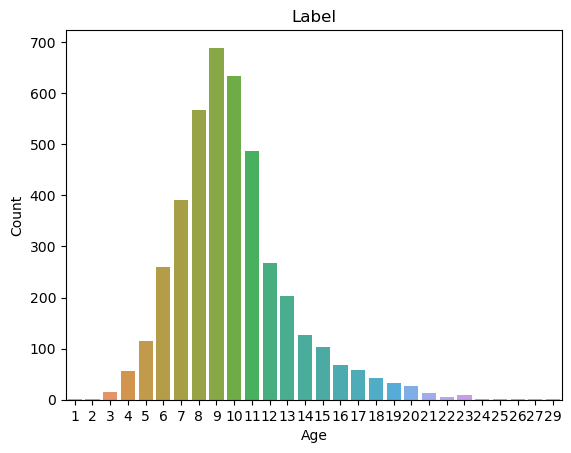

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Label")

### 4. StandardScale를 사용

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# ColumnTransformer를 사용하여 수치형 데이터에 StandardScaler, 범주형 데이터에 OneHotEncoder 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']),
        ('cat', OneHotEncoder(), ['Sex'])
    ])

# 전체 데이터에 전처리 적용
df_transformed = preprocessor.fit_transform(df.drop('Rings', axis=1))
df_transformed


array([[-0.57455813, -0.43214879, -1.06442415, ...,  0.        ,
         0.        ,  1.        ],
       [-1.44898585, -1.439929  , -1.18397831, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  0.        ,
         0.        ,  1.        ]])

### 6. 함수형 모델 반드시 사용 (DL의 경우, p.265)

In [13]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# 모델 입력 및 출력 차원 설정
input_dim = df_transformed.shape[1]  # 입력 데이터의 특성 수
output_dim = 1  # 회귀 문제의 출력 (Rings)

# 함수형 API를 사용한 모델 정의
inputs = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(output_dim)(x)

# 모델 객체 생성
model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃 변수 설정
y = df['Rings']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_transformed, y, test_size=0.2, random_state=42)


### 7. ML Regression

In [16]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 생성 및 훈련
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = linear_regressor.predict(X_test)

# 성능 평가
mean_squared_error(y_test,y_pred)

4.89123244712858

In [17]:
from sklearn.tree import DecisionTreeRegressor
# 선형 회귀 모델 생성 및 훈련
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = decision_regressor.predict(X_test)

# 성능 평가
mean_squared_error(y_test,y_pred)

9.125598086124402

In [18]:
from sklearn.ensemble import RandomForestRegressor
# 선형 회귀 모델 생성 및 훈련
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# 성능 평가
mean_squared_error(y_test,y_pred)

5.101502153110048

In [19]:
from sklearn.svm import SVR
# 선형 회귀 모델 생성 및 훈련
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = svr_regressor.predict(X_test)

# 성능 평가
mean_squared_error(y_test,y_pred)

4.9245901617888075

### 7. DL Regression

In [20]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 테스트 데이터에 대한 예측
y_pred_dl = model.predict(X_test)

# 성능 평가 (예: 평균 제곱 오차)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_dl)
print(f"Mean Squared Error: {mse}")


Epoch 1/50


2024-05-13 00:02:39.833367: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


84/84 [==============================] - 1s 6ms/step - loss: 44.7070 - val_loss: 13.3921
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 9.3123 - val_loss: 4.6522
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 6.4074 - val_loss: 4.3459
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 5.6400 - val_loss: 4.2574
Epoch 5/50
84/84 [==============================] - 0s 1ms/step - loss: 5.2752 - val_loss: 4.5553
Epoch 6/50
84/84 [==============================] - 0s 1ms/step - loss: 5.0959 - val_loss: 4.1695
Epoch 7/50
84/84 [==============================] - 0s 1ms/step - loss: 4.9246 - val_loss: 4.0920
Epoch 8/50
84/84 [==============================] - 0s 2ms/step - loss: 4.8211 - val_loss: 4.0403
Epoch 9/50
84/84 [==============================] - 0s 2ms/step - loss: 4.7536 - val_loss: 3.9745
Epoch 10/50
84/84 [==============================] - 0s 2ms/step - loss: 4.6704 - val_loss: 3.9836
Epoch 11/50
84/84 [=========